In [128]:

import pandas as pd
import numpy as np

# PLOTTING
import matplotlib.pyplot as plt
#set a global label font size for all plots
plt.rc('font', size=10)
plot_colours = ['lightgreen', 'mediumturquoise', 'deepskyblue', 'cornflowerblue','mediumpurple','mediumorchid','mediumvioletred']
# seaborn and global settings
import seaborn as sns
sns.axes_style("whitegrid")
# set global pallette
sns.set_palette(sns.color_palette(plot_colours))
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# MODELS 
from sklearn.cluster import KMeans, k_means

# PREPROCESSING
from sklearn.preprocessing import scale ,StandardScaler
from sklearn.preprocessing import LabelEncoder

# POST PROCESSING
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# METRICS
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



In [129]:
# import the dataset
df = pd.read_csv('customers (1).csv')

In [130]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [131]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [132]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [133]:
# total amoun tof rows that contain null values
df.isnull().sum(axis=1).sum()
# total amount of rows in the dataset
df.shape[0]
# percentage of rows that contain null values
print(round((df.isnull().sum(axis=1).sum()/df.shape[0]*100)),'% of the total rows contain null values')

20 % of the total rows contain null values


I am going to remove all the rows that contain null values because I am only interested in raw unchanged data I want to see the result with a smaller dataset rather than data that has been manipulated. 

In [134]:
# drop all the rows that contain null values
df.dropna(inplace=True)


In [135]:
for column in df:
    unique_vals = df[column].unique()
    n_vals = len(unique_vals)
    if n_vals < 10:
        print(f'{column} ______________ has {n_vals} unique values: {unique_vals}')
        print('')
    else:
        print(f'{column} ~~~~~~~~~~~~~~ has {n_vals} unique values')
        print('')

ID ~~~~~~~~~~~~~~ has 2154 unique values

Gender ______________ has 2 unique values: ['Female' 'Male']

Ever_Married ______________ has 2 unique values: ['Yes' 'No']

Age ~~~~~~~~~~~~~~ has 67 unique values

Graduated ______________ has 2 unique values: ['Yes' 'No']

Profession ______________ has 9 unique values: ['Engineer' 'Healthcare' 'Executive' 'Doctor' 'Artist' 'Lawyer'
 'Entertainment' 'Homemaker' 'Marketing']

Work_Experience ~~~~~~~~~~~~~~ has 15 unique values

Spending_Score ______________ has 3 unique values: ['Low' 'Average' 'High']

Family_Size ______________ has 9 unique values: [1. 4. 2. 5. 3. 6. 9. 7. 8.]

Var_1 ______________ has 7 unique values: ['Cat_6' 'Cat_4' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']



In [136]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

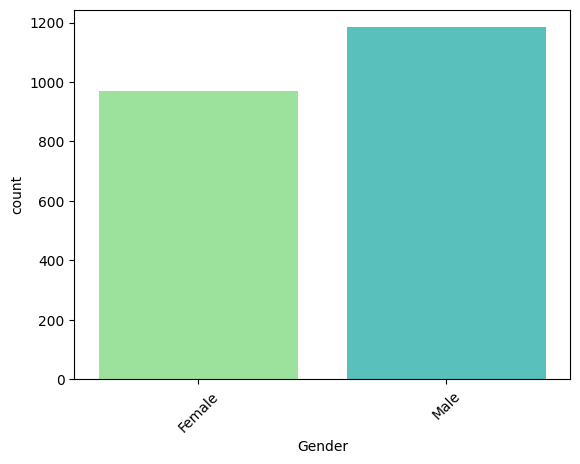

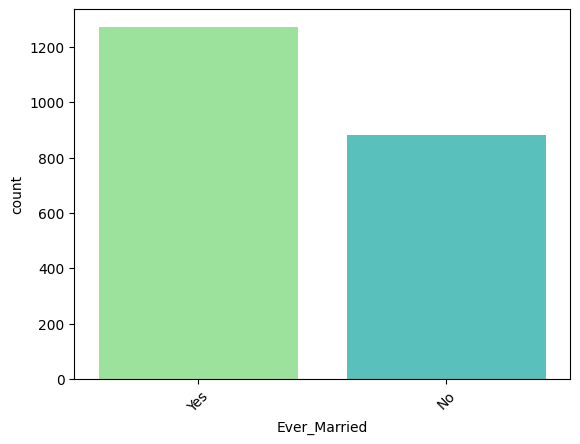

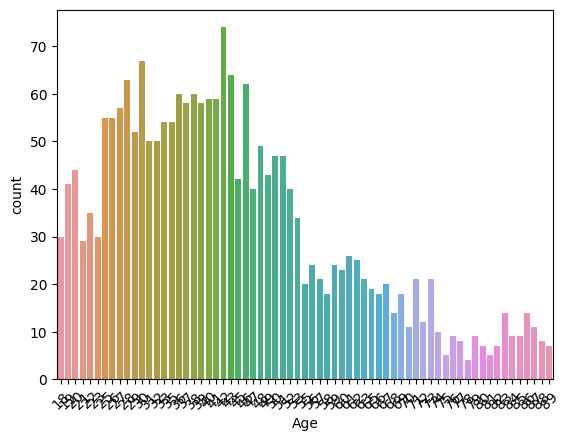

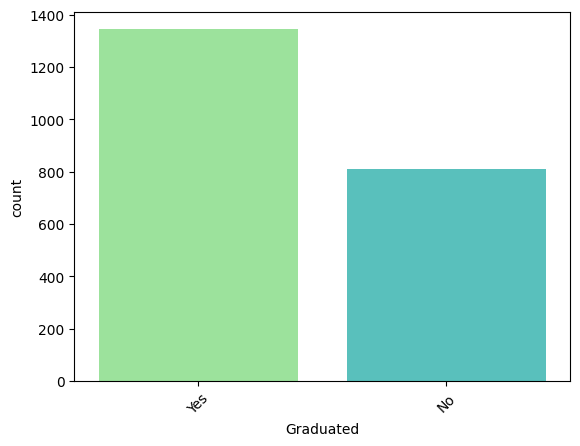

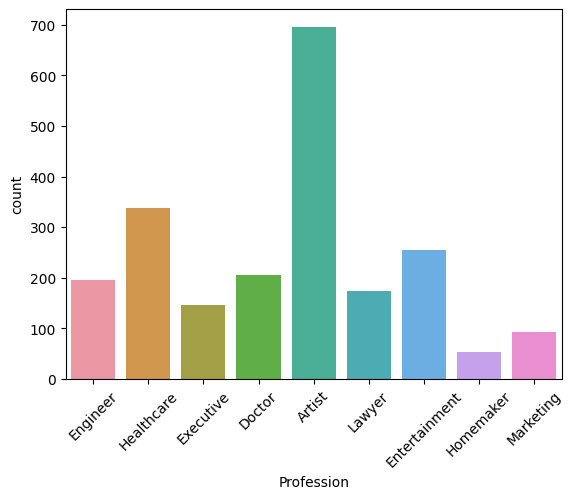

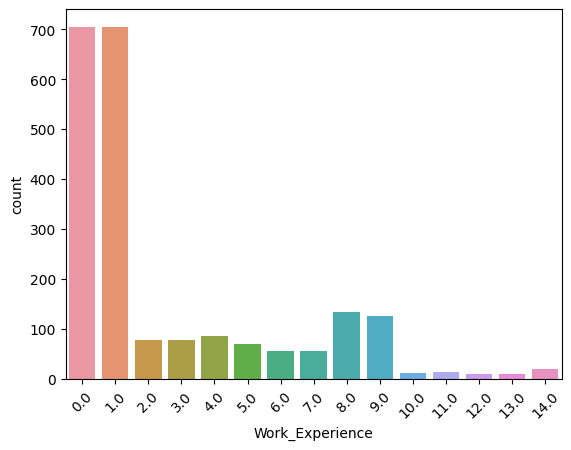

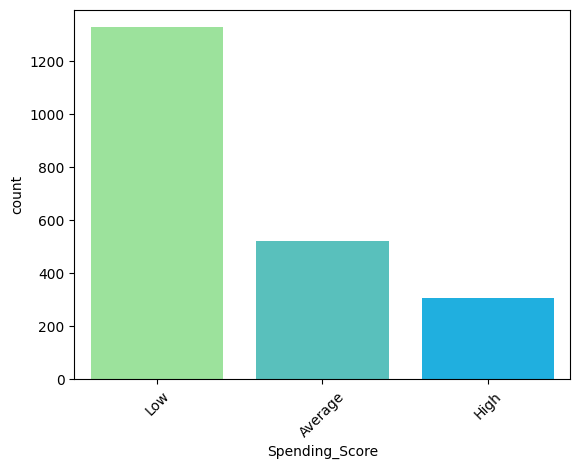

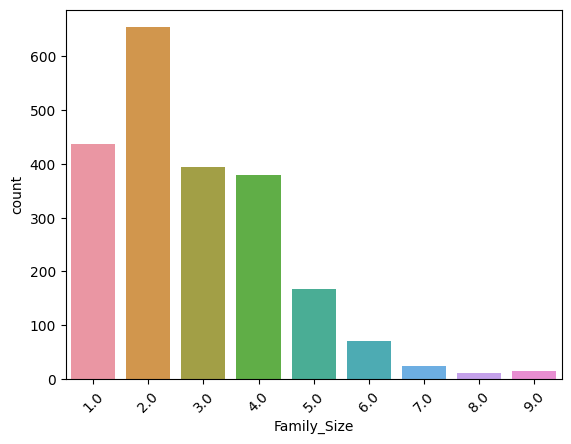

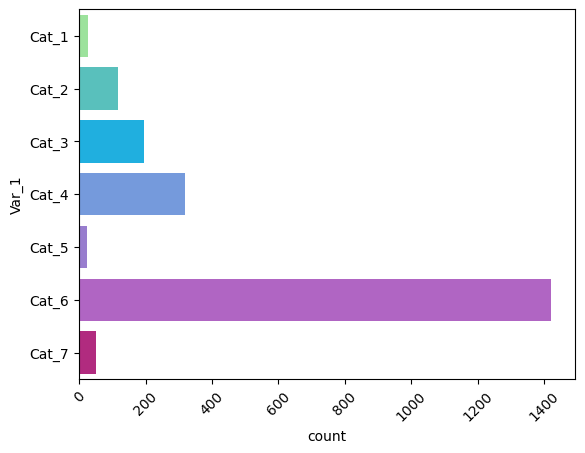

In [137]:
df_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

for f in df_columns:
    if f == 'Var_1':
        sns.countplot(y=f, data=df, order=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'])
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.countplot(x=f, data=df)
        plt.xticks(rotation=45)
        plt.show()


From analysing these charts it appears that the majority of the individuals are young artists in a small family. 

In [138]:
df['Age'].unique().shape

(67,)

In [139]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


### Preprocessing
- Convert all the columns to numerics using dummies, as most of the columns have only 2 inputs this should work well. <br><br>
- I will also be removing the profession column from the dataset because the model needs to be usable in the future and it will not be if the users have to enter their profession but the profession is not in the list that the model was trained on. There are so many professions that I think it is unwise to include this small amount in the model training. <br><br>
- Next I am converting the Var_1 to numbers as well using label encoder because the model will give us a number value and we can use this to compare with our models result. 

In [140]:
to_dummies_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']
print(df.shape)

dummies_df = pd.get_dummies(df, columns=to_dummies_columns)
dummies_df = dummies_df.drop('Profession', axis=1)
print(dummies_df.shape)

(2154, 10)
(2154, 102)


In [141]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
var_1_label = le.fit_transform(dummies_df['Var_1'])

In [142]:
# Appending the array to our dataFrame
dummies_df["Var_1"] = var_1_label

In [143]:
dummies_df.head()

,ID,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Age_18,Age_19,Age_20,Age_21,...,Spending_Score_Low,Family_Size_1.0,Family_Size_2.0,Family_Size_3.0,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0
0,458989,5,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,458994,5,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,459000,5,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,459003,3,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,459005,5,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Label encoding results: 

In [144]:
# compare the unique values in the spending_score column to the spending_score_lb column
print('---VAR_1---')
print(dummies_df['Var_1'].groupby(df['Var_1']).unique())


---VAR_1---
Var_1
Cat_1    [0]
Cat_2    [1]
Cat_3    [2]
Cat_4    [3]
Cat_5    [4]
Cat_6    [5]
Cat_7    [6]
Name: Var_1, dtype: object


In [145]:
dummies_df.to_csv('customers_dummied.csv', index=False)

### Kmeans Model Using Dummies Data

In [146]:
# drop the columns we dont need for the model
X1 = dummies_df.drop('ID', axis=1) 
X1 = X1.drop('Var_1', axis=1)
# convert the data to a numpy array
X1 = X1.values

y1 = dummies_df['Var_1']

In [147]:
# I am starting with 7 clusters because there are 7 unique values in the Var_1 column
kmeans_model = KMeans(n_clusters=7, random_state=0)
kmeans_model.fit(X1)

KMeans(n_clusters=7, random_state=0)

In [148]:
# added the results of the kmeans model using  to the dataframe
dummies_df['Kmeans_7'] = kmeans_model.labels_

In [149]:
dummies_df.head()

,ID,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Age_18,Age_19,Age_20,Age_21,...,Family_Size_1.0,Family_Size_2.0,Family_Size_3.0,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0,Kmeans_7
0,458989,5,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,458994,5,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,459000,5,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
5,459003,3,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,459005,5,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4


In [150]:
dummies_df['Kmeans_7'].value_counts()

6    446
0    436
1    334
4    267
3    253
5    241
2    177
Name: Kmeans_7, dtype: int64

In [151]:
dummies_df['Var_1'].value_counts()

5    1421
3     320
2     195
1     116
6      52
0      27
4      23
Name: Var_1, dtype: int64

In [152]:
print('The inertia is: ', kmeans_model.inertia_)

The inertia is:  6394.700004854882


The inertia shows how close the clusters are. Its a method to evaluate how good the clusters are. The closer to zero the better. <br><br>
NEXT: evaluate different cluster ammount to see if there is a more optimum number, using the inertial values as a reference.

In [153]:
clusters = range(2,21)
inertia = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X1)
    i = kmeans_model.inertia_
    inertia.append(i)
    print('Inertia for ', k, ' clusters is: ', i)

Inertia for  2  clusters is:  8255.819535361312
Inertia for  3  clusters is:  7636.698498368447
Inertia for  4  clusters is:  7155.857842228519
Inertia for  5  clusters is:  6797.316650674451
Inertia for  6  clusters is:  6561.3898590044055
Inertia for  7  clusters is:  6394.700004854882
Inertia for  8  clusters is:  6123.254909173488
Inertia for  9  clusters is:  6002.172196334806
Inertia for  10  clusters is:  5877.631404424543
Inertia for  11  clusters is:  5692.05942237134
Inertia for  12  clusters is:  5651.730477579268
Inertia for  13  clusters is:  5585.871731480082
Inertia for  14  clusters is:  5443.930320469416
Inertia for  15  clusters is:  5315.116318345219
Inertia for  16  clusters is:  5311.098608142609
Inertia for  17  clusters is:  5254.641223762068
Inertia for  18  clusters is:  5182.068907083719
Inertia for  19  clusters is:  5142.518614664116
Inertia for  20  clusters is:  5011.697250317038


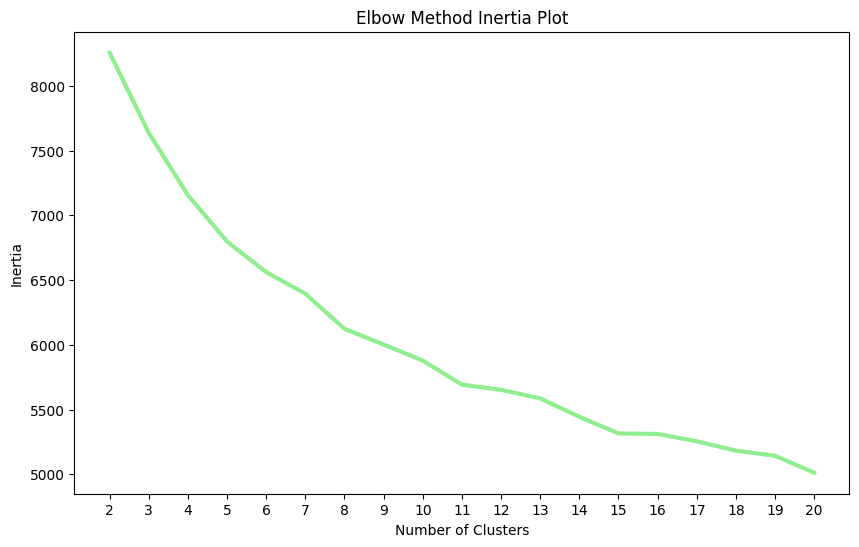

In [154]:
# elbow method inertia plot
fig, ax1 = plt.subplots(figsize=(10,6))
xx1 = np.arange(len(clusters))
ax1.plot(xx1, inertia, linewidth=3)
ax1.set_xticks(xx1)
ax1.set_xticklabels(clusters)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method Inertia Plot')
plt.show()

In [155]:
X1.shape

(2154, 100)

In [156]:
# running PCA to visualise the clusters
# X1 is currently a numpy array with 100 variables
dummies_Y = dummies_df['Kmeans_7']

target_names = ['Cat_0', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6']

# the aim is to visualise the data so we need to reduce the dimensions down to two so they can be plotted
pca = PCA(n_components=2, random_state=0)
# transforming the 100 columns down to 2
X1_r = pca.fit(X1).transform(X1)

In [157]:
# checking to see that the results are as expected
# I was excpecting the columns to be reduced to 2 and it has 
X1_r.shape

(2154, 2)

Explained variance ratio (first two components): [0.17909061 0.11806025]
These two principal components control  29.72 % of the variance in the dataset.


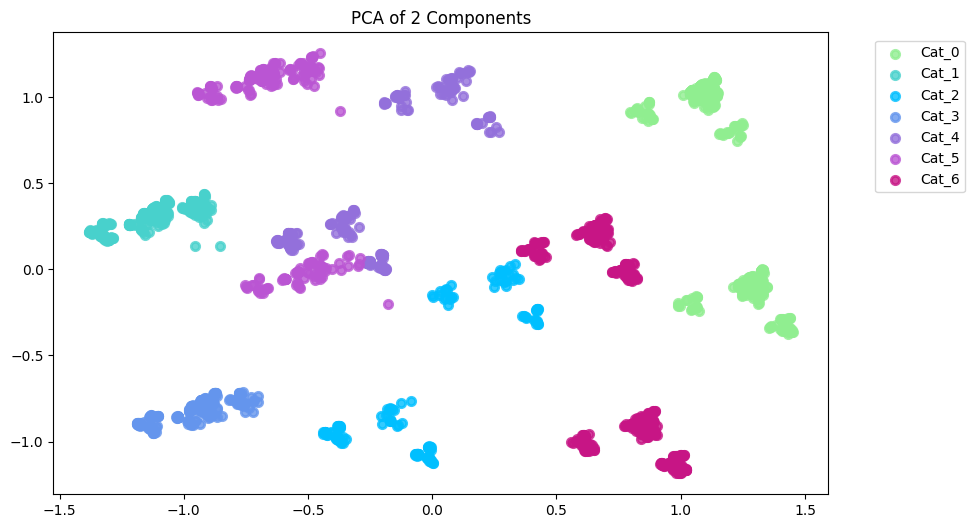

In [158]:
# percentage of variance explained for each component
components = pca.explained_variance_ratio_
print('Explained variance ratio (first two components): %s' % str(components))
print('These two principal components control ', round(sum(components)*100,2), '% of the variance in the dataset.')

# plotting the data with the first two principal components
plt.figure(figsize=(10,6))
lw = 2
alpha = 0.8
# color will be the plot_colours array that was created earlier in the first cell under matplotlib
# i will be the number of clusters [0,1,2,3,4,5,6]
# target_name will be the target_names array of what I want the clusters to be called
for color, i, target_name in zip(plot_colours, [0, 1, 2, 3, 4, 5, 6], target_names):
    # creating a scatter plot by taking the X1_r data that has been transformed down to 2 columns
    # X1_r[dummies_Y == i, 0] is the X position on the graph
    # X1_r[dummies_Y == i, 1] is the Y position on the graph
    plt.scatter(X1_r[dummies_Y == i, 0], X1_r[dummies_Y == i, 1], color=color, alpha=alpha, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
# moves the legend outside of the graph area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Components')
plt.show()

By maximising between cluster variance, you minimise within cluster variance. Therefore applying PCA before clustering could potentially help you get better clusters with more variace in Kmeans. 

#### Identifying the best number of components

In [159]:
# the number of columns in the dataset ie the number of variables
# 100
n_components = X1.shape[1]

# running PCA with all the variables
pca = PCA(n_components=n_components, random_state=0)
X1_r = pca.fit(X1).transform(X1)


Total variance in this dataset is:  4.538185365500232
95% of the variance is:  4.31127609722522

Variance explained with 30 n_componenets:  3.839654352883042
Variance explained with 40 n_componenets:  4.070683563872813
Variance explained with 45 n_componenets:  4.166784650036663
Variance explained with 50 n_componenets:  4.243318934030557
Variance explained with 55 n_componenets:  4.304076762712601
56 is the winner.
Variance explained with 56 n_componenets:  4.31496837446831
Variance explained with 57 n_componenets:  4.325367466307899
Variance explained with 58 n_componenets:  4.335242611129186


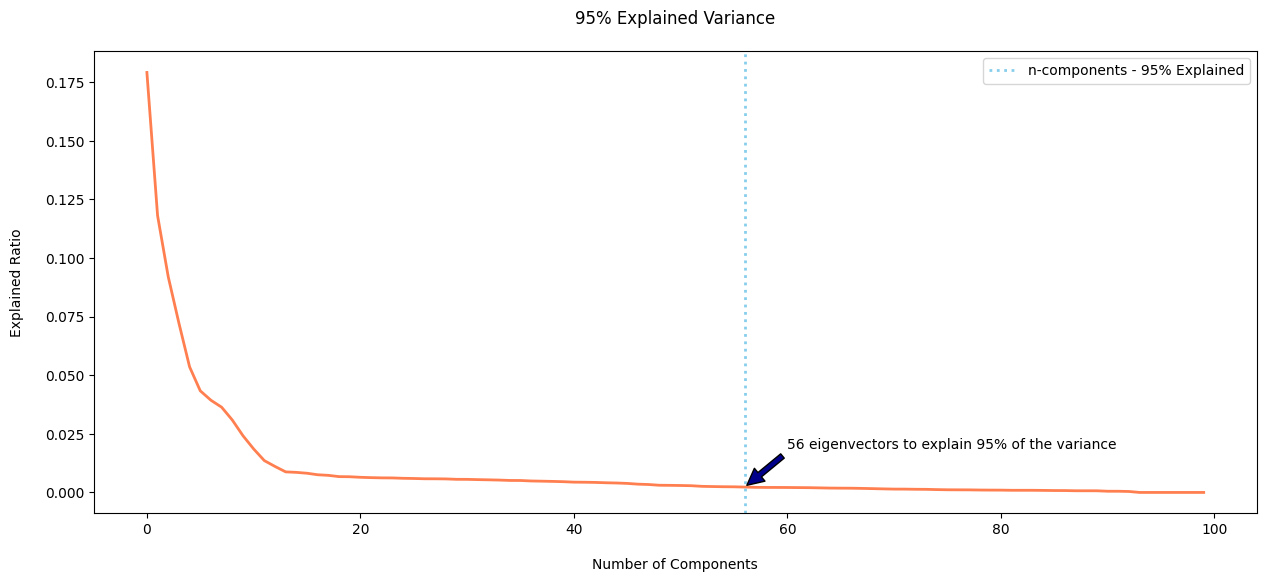

In [181]:
# the ideal PCA is 95% of the explained variance 
# calculating the 95% percent variance
total_variance = sum(pca.explained_variance_)
print('Total variance in this dataset is: ', total_variance)
var_95 = total_variance * 0.95
print('95% of the variance is: ', var_95)
print('')

# creating a dataframe of the components and the explained variance 
# this will save the explained variance for each component (column/variable) as a row in the dataset
a = zip(range(0,n_components+1), pca.explained_variance_)
a = pd.DataFrame(a, columns=['PCA Comp', 'Explained Variance'])

# trying to hit the 95% number shown below at about 4.31  
# sum of the first 30 components in the new dataframe
print('Variance explained with 30 n_componenets: ', sum(a['Explained Variance'][0:30]))
print('Variance explained with 40 n_componenets: ', sum(a['Explained Variance'][0:40]))
print('Variance explained with 45 n_componenets: ', sum(a['Explained Variance'][0:45]))
print('Variance explained with 50 n_componenets: ', sum(a['Explained Variance'][0:50]))
print('Variance explained with 55 n_componenets: ', sum(a['Explained Variance'][0:55]))
# 56 components is the closest number of components to reach the 95% variance 
print('56 is the winner.')
print('Variance explained with 56 n_componenets: ', sum(a['Explained Variance'][0:56]))
print('Variance explained with 57 n_componenets: ', sum(a['Explained Variance'][0:57]))
print('Variance explained with 58 n_componenets: ', sum(a['Explained Variance'][0:58]))

# plot the data (ratio)
plt.figure(figsize=(15,6))
plt.plot(pca.explained_variance_ratio_, linewidth=lw, color='coral')
plt.xlabel('Number of Components', labelpad=15)
plt.ylabel('Explained Ratio',labelpad=15)
plt.title('95% Explained Variance',pad=20)

# plot a line showing the 95% variance
plt.axvline(56, color='skyblue', linestyle=':', linewidth=lw, label='n-components - 95% Explained')
plt.legend(prop=dict(size=10))

# adding an arrow 
# aogenvectors is the same as principle components
plt.annotate('56 eigenvectors to explain 95% of the variance', 
    xy = (56, pca.explained_variance_ratio_[56]), 
    # 60 is the angle of the arrow in degrees
    # the 10 is the height of the text
    xytext = (60, pca.explained_variance_ratio_[10]), 
    arrowprops = dict(facecolor = 'darkblue', shrink = 0.05),)
plt.show()


In [162]:
a

,PCA Comp,Explained Variance
0,0,8.127464e-01
1,1,5.357793e-01
2,2,4.172870e-01
3,3,3.275822e-01
4,4,2.430037e-01
...,...,...
95,95,1.616725e-31
96,96,1.086925e-31
97,97,7.480511e-32
98,98,5.640787e-32


### Kmeans Using PCA and New Components Number

Inertia for  2  clusters is:  7773.789704933106
Inertia for  3  clusters is:  7154.773203536753
Inertia for  4  clusters is:  6681.361233413744
Inertia for  5  clusters is:  6316.008904329816
Inertia for  6  clusters is:  6051.072255813595
Inertia for  7  clusters is:  5912.394674143995
Inertia for  8  clusters is:  5675.533116013998
Inertia for  9  clusters is:  5468.0234637593985
Inertia for  10  clusters is:  5388.629119623687
Inertia for  11  clusters is:  5291.577487942611
Inertia for  12  clusters is:  5178.420166239326
Inertia for  13  clusters is:  5073.551708039371
Inertia for  14  clusters is:  5000.342728288875
Inertia for  15  clusters is:  4904.6312820933645
Inertia for  16  clusters is:  4864.041427221149
Inertia for  17  clusters is:  4786.217583587946
Inertia for  18  clusters is:  4741.897294237065
Inertia for  19  clusters is:  4602.877866364011
Inertia for  20  clusters is:  4592.0156359448065


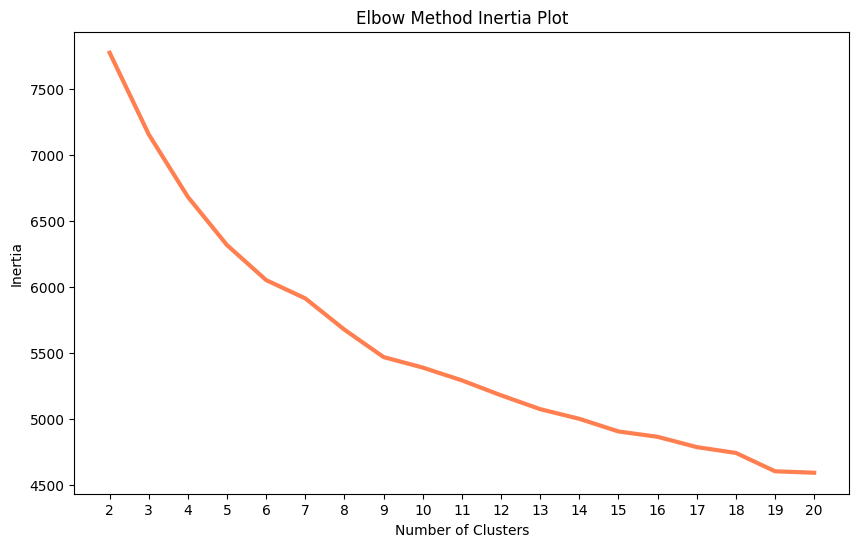

In [183]:
# run PCA again with 56 components 
pca = PCA(n_components=56, random_state=0)
X1_r = pca.fit(X1).transform(X1)

# Kmeans
clusters = range(2,21)
pca_inertia = []

for p in clusters:
    kmeans_model = KMeans(n_clusters=p, random_state=1)
    kmeans_model.fit(X1_r)
    i = kmeans_model.inertia_
    pca_inertia.append(i)
    print('Inertia for ', p, ' clusters is: ', i)

# plot the inertia - elbow method
fig, ax2 = plt.subplots(figsize=(10,6))
xx2 = np.arange(len(clusters))
ax2.plot(xx2, pca_inertia, linewidth=3, color='coral')
ax2.set_xticks(xx2)
ax2.set_xticklabels(clusters)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method Inertia Plot')
plt.show()

Before PCA the inertia for 7 clusters was 6394.70 <br>
After PCA the inertia for 7 clusters is 5912.39 <br>
There is a slight improvement. 

### Kmeans Using Encoded & Scaled Data
Since the clusters are so even I wanted to try out a different cleaning method. I already wrote the code and saved it to a file called customers_encoded.csv before deleting the code so I can just pull in that csv and start working with it now. 

In [517]:
encoded_df = pd.read_csv('customers_encoded.csv')

In [518]:
encoded_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_lb,Ever_Married_lb,Graduated_lb,Profession_lb,Spending_Score_lb,Var_1_lb
0,458989,36,0.0,1.0,0,1,1,2,2,5
1,458994,37,8.0,4.0,1,1,1,5,0,5
2,459000,59,11.0,2.0,1,1,0,4,1,5
3,459003,47,0.0,5.0,1,1,1,1,1,3
4,459005,61,5.0,3.0,1,1,1,1,2,5


In [519]:
# drop the profession column for the same reasons as stated above
encoded_df = encoded_df.drop('Profession_lb', axis=1)

y = encoded_df['Var_1_lb']

In [520]:
# drop the id and var_1_lb columns
X2 = encoded_df.drop('ID', axis=1)
X2 = X2.drop('Var_1_lb', axis=1)

In [521]:
X2.head()

,Age,Work_Experience,Family_Size,Gender_lb,Ever_Married_lb,Graduated_lb,Spending_Score_lb
0,36,0.0,1.0,0,1,1,2
1,37,8.0,4.0,1,1,1,0
2,59,11.0,2.0,1,1,0,1
3,47,0.0,5.0,1,1,1,1
4,61,5.0,3.0,1,1,1,2


In [522]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X2)
scaled_data


array([[-0.44524796, -0.76298583, -1.17270206, ...,  0.83270417,
         0.77555592,  0.73920161],
       [-0.38557499,  1.62925795,  0.74238531, ...,  0.83270417,
         0.77555592, -1.62142147],
       [ 0.92723055,  2.52634937, -0.53433961, ...,  0.83270417,
        -1.28939767, -0.44110993],
       ...,
       [-0.50492094, -0.46395536, -1.17270206, ..., -1.20090669,
         0.77555592,  0.73920161],
       [ 0.2111548 , -0.46395536,  1.38074776, ...,  0.83270417,
         0.77555592, -0.44110993],
       [-0.02753711,  1.92828842,  0.10402285, ..., -1.20090669,
         0.77555592,  0.73920161]])

In [523]:
scaled_data.shape

(2154, 7)

In [524]:
kmeans_m = KMeans(n_clusters=7, random_state=0)
kmeans_m.fit(X2)

KMeans(n_clusters=7, random_state=0)

In [525]:
encoded_df['Kmeans_7'] = kmeans_m.labels_

In [526]:
encoded_df['Kmeans_7'].value_counts()

3    546
0    469
4    404
5    243
1    221
2    167
6    104
Name: Kmeans_7, dtype: int64

In [534]:
print('The inertia is: ', kmeans_m.inertia_)


The inertia is:  43924.001708419215


The inertia is significantly lower than the previous models.

In [528]:
clusters = range(2,21)
new_inertia = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X2)
    i = kmeans_model.inertia_
    new_inertia.append(i)
    print('Inertia for ', k, ' clusters is: ', i)

Inertia for  2  clusters is:  228843.01566437876
Inertia for  3  clusters is:  117791.33531875102
Inertia for  4  clusters is:  80749.92043988477
Inertia for  5  clusters is:  62186.647200528896
Inertia for  6  clusters is:  51606.08139365134
Inertia for  7  clusters is:  43924.001708419215
Inertia for  8  clusters is:  36874.32531560832
Inertia for  9  clusters is:  30953.33579377592
Inertia for  10  clusters is:  28620.580133193544
Inertia for  11  clusters is:  26735.29251485924
Inertia for  12  clusters is:  24527.9188691285
Inertia for  13  clusters is:  23188.77612915064
Inertia for  14  clusters is:  21790.41141767321
Inertia for  15  clusters is:  20489.900560380654
Inertia for  16  clusters is:  19341.49192463746
Inertia for  17  clusters is:  18425.65452497928
Inertia for  18  clusters is:  17643.608751747226
Inertia for  19  clusters is:  16888.67389177232
Inertia for  20  clusters is:  16638.721224096244


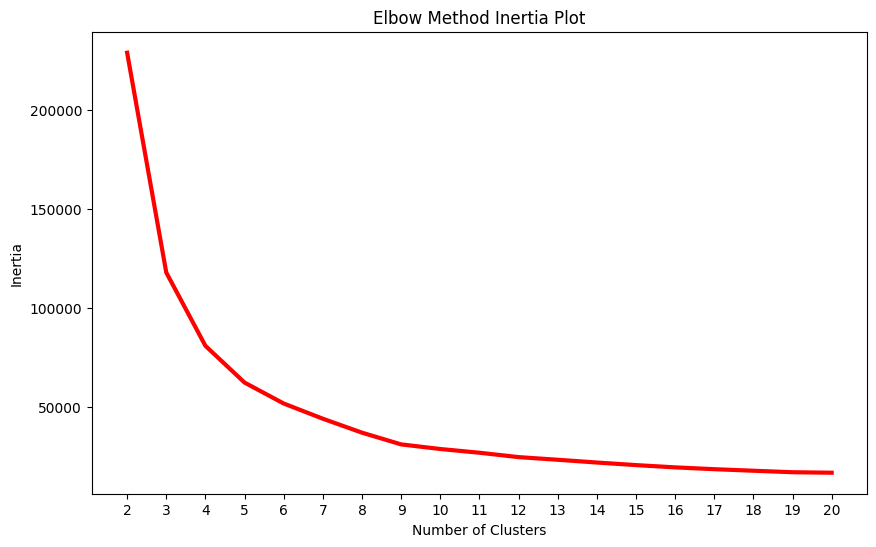

In [536]:
# elbow method inertia plot
fig, ax2 = plt.subplots(figsize=(10,6))
xx2 = np.arange(len(clusters))
ax2.plot(xx2, new_inertia, linewidth=3, color='red')
ax2.set_xticks(xx2)
ax2.set_xticklabels(clusters)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method Inertia Plot')
plt.show()